In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [96]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [97]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [98]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [99]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [100]:
df.shape

(1303, 11)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [102]:
# Check for duplicate rows
df.duplicated().sum()

29

In [103]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [104]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [105]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [106]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [107]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [108]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.4+ KB


## Exploratory Data Analysis and Feature Engineering

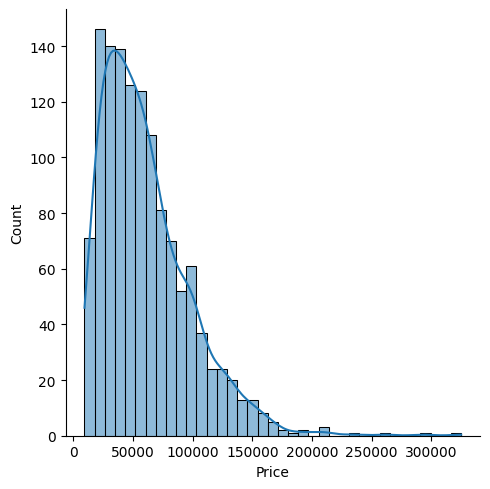

In [110]:
sns.displot(df['Price'], kde=True)

<Axes: xlabel='Company'>

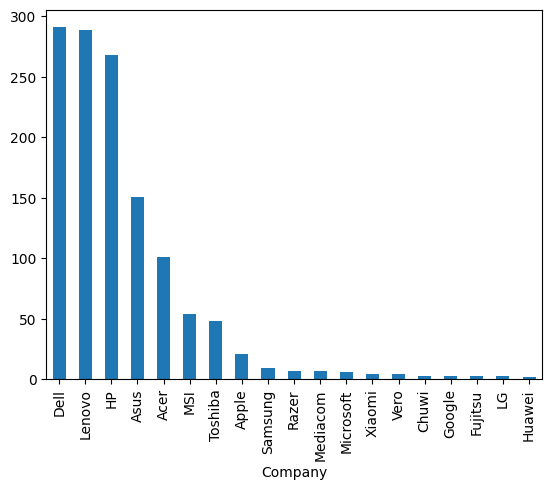

In [111]:
df['Company'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Average Price')

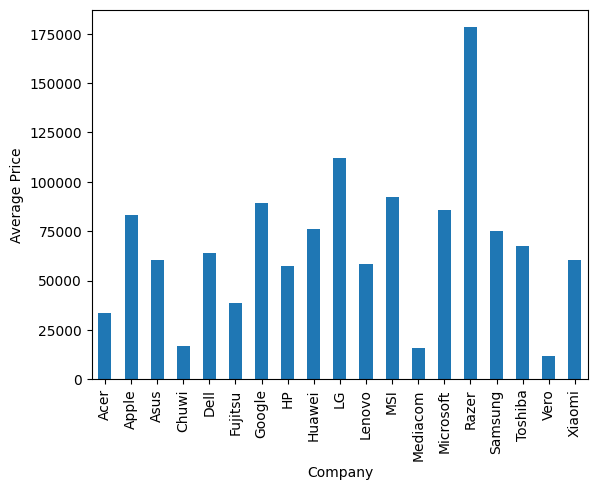

In [112]:
df.groupby('Company')['Price'].mean().plot(kind='bar')
plt.ylabel('Average Price')

Price highly depends on laptop brand

<Axes: xlabel='TypeName'>

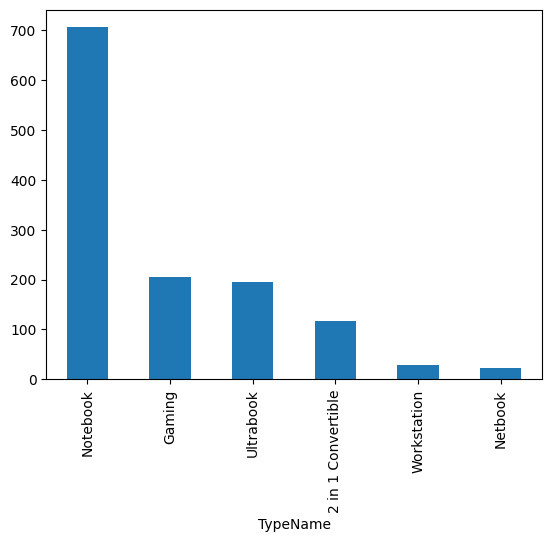

In [113]:
df['TypeName'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Average Price')

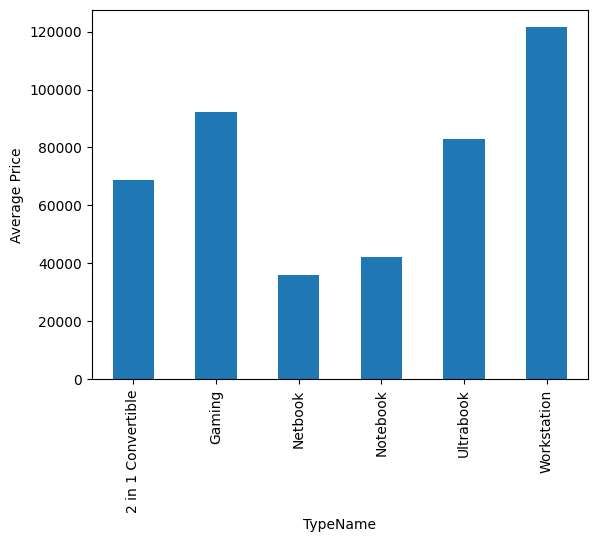

In [114]:
df.groupby('TypeName')['Price'].mean().plot(kind='bar')
plt.ylabel('Average Price')

In [115]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

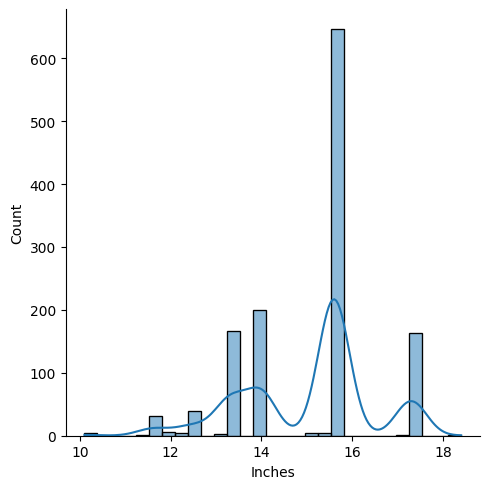

In [116]:
sns.displot(df['Inches'], kde=True)
# Most of the laptops are in the range of 13-16 inches
# Inches is not a continuous variable -- catagorical

<Axes: xlabel='Inches', ylabel='Price'>

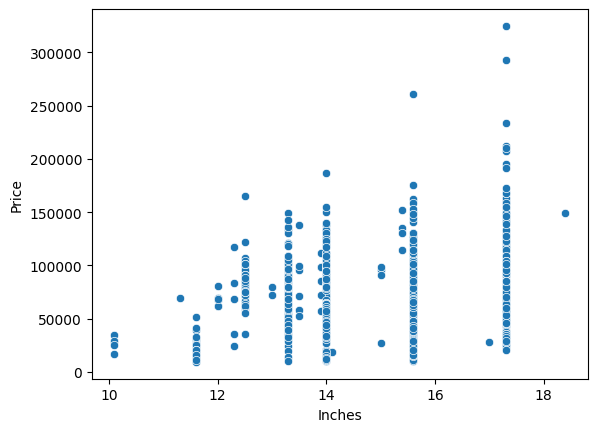

In [117]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [118]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [119]:
df['Touchscreen']=np.where(df['ScreenResolution'].str.contains('Touch'),1,0)

In [120]:
df.loc[19]

Company                                                  Dell
TypeName                                            Ultrabook
Inches                                                   13.3
ScreenResolution    IPS Panel Full HD / Touchscreen 1920x1080
Cpu                                Intel Core i5 8250U 1.6GHz
Ram                                                         8
Memory                                              128GB SSD
Gpu                                    Intel UHD Graphics 620
OpSys                                              Windows 10
Weight                                                   1.22
Price                                                52161.12
Touchscreen                                                 1
Name: 19, dtype: object

<Axes: xlabel='Touchscreen'>

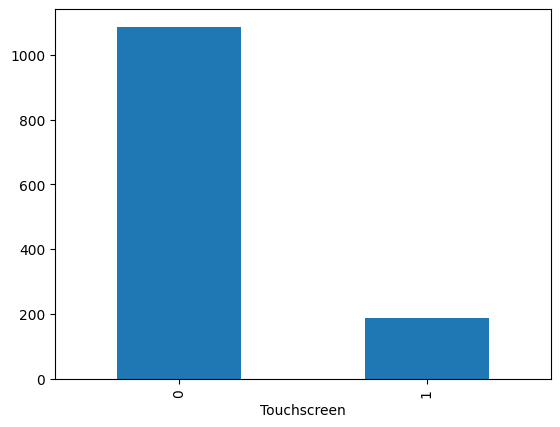

In [121]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen'>

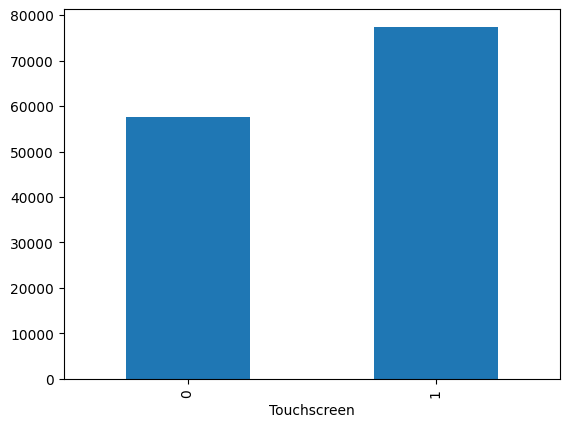

In [122]:
df.groupby('Touchscreen')['Price'].mean().plot(kind='bar')

In [123]:
df['IPS']=np.where(df['ScreenResolution'].str.contains('IPS'),1,0)

In [124]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

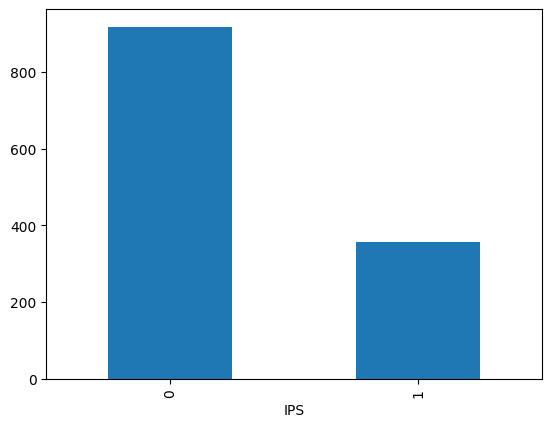

In [125]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS'>

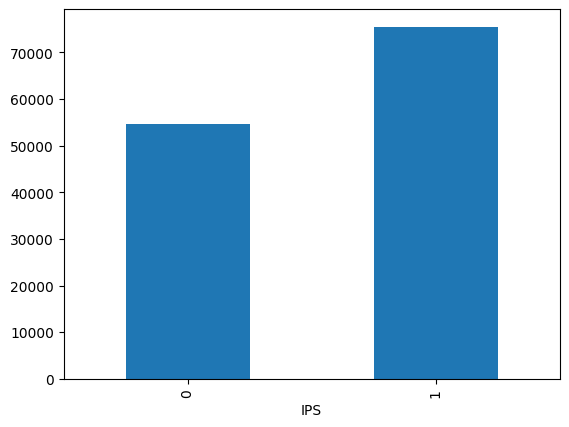

In [126]:
df.groupby('IPS')['Price'].mean().plot(kind='bar')

In [127]:
df['Display_HD']=np.where(df['ScreenResolution'].str.contains('HD'),1,0)

<Axes: xlabel='Display_HD'>

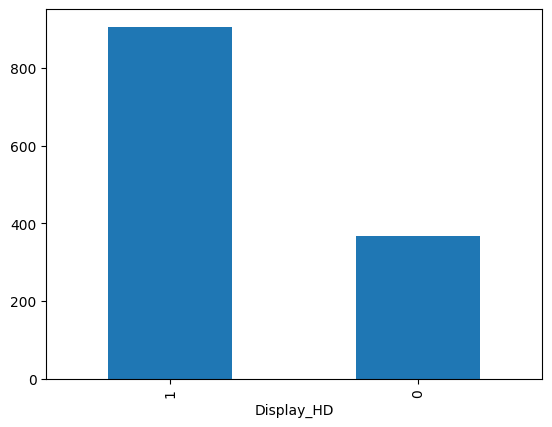

In [128]:
df['Display_HD'].value_counts().plot(kind='bar')

<Axes: xlabel='Display_HD'>

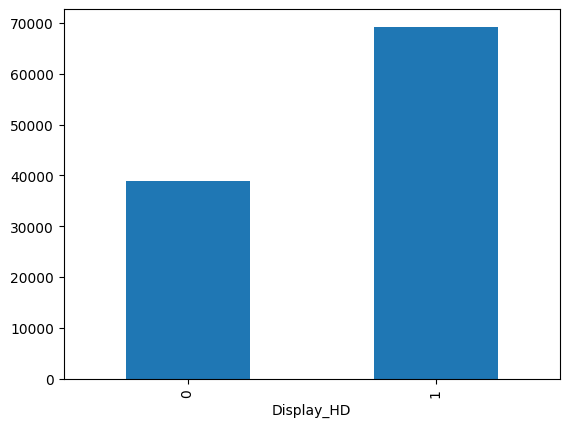

In [129]:
df.groupby('Display_HD')['Price'].mean().plot(kind='bar')

In [130]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0


In [131]:
df['x_resolution']=df['ScreenResolution'].str.split('x').str[0].str.split(' ').str[-1].astype(int)
df['y_resolution']=df['ScreenResolution'].str.split('x').str[1].astype(int)

In [132]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,2560,1600


In [133]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
IPS                   int64
Display_HD            int64
x_resolution          int64
y_resolution          int64
dtype: object

<Axes: xlabel='x_resolution'>

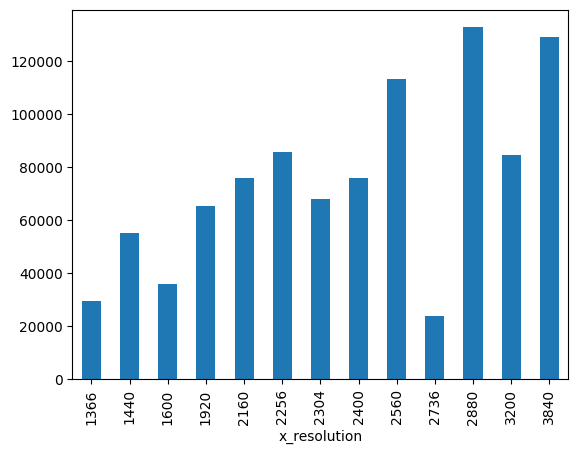

In [134]:
df.groupby('x_resolution')['Price'].mean().plot(kind='bar')

<Axes: xlabel='y_resolution'>

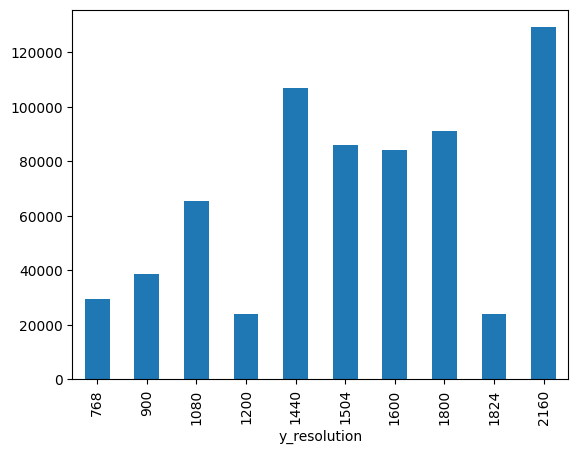

In [135]:
df.groupby('y_resolution')['Price'].mean().plot(kind='bar')

In [136]:
df.select_dtypes(exclude=['object']).corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
Touchscreen     0.188631
IPS             0.250358
Display_HD      0.367844
x_resolution    0.552074
y_resolution    0.548111
Name: Price, dtype: float64

Inches is not that much correlated with Price, so we will introduce a new column PPI(Pixel Per Inch) with the help of x_resolution, y_resolution and Inches

In [137]:
df['PPI'] = (((df['x_resolution']**2) + (df['y_resolution']**2))**0.5)/df['Inches']

In [138]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,x_resolution,y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,2560,1600,226.983005


In [139]:
df.select_dtypes(exclude=['object']).corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
Touchscreen     0.188631
IPS             0.250358
Display_HD      0.367844
x_resolution    0.552074
y_resolution    0.548111
PPI             0.469539
Name: Price, dtype: float64

In [140]:
df.drop(['ScreenResolution','x_resolution','y_resolution', 'Inches'],axis=1,inplace=True)

In [141]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005


In [142]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [143]:
df['Cpu Name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [144]:
df.head(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,0,100.454670,AMD A9-Series 9420
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,0,220.534624,Intel Core i7
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1,157.350512,Intel Core i7
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1,157.350512,Intel Core i5


In [145]:
def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    elif "Intel" in text:
        return "Other Intel Processor"
    elif "AMD" in text:
        return "AMD Processor"

In [146]:
df['Cpu_brand']=df['Cpu Name'].apply(fetch_processor)

In [147]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

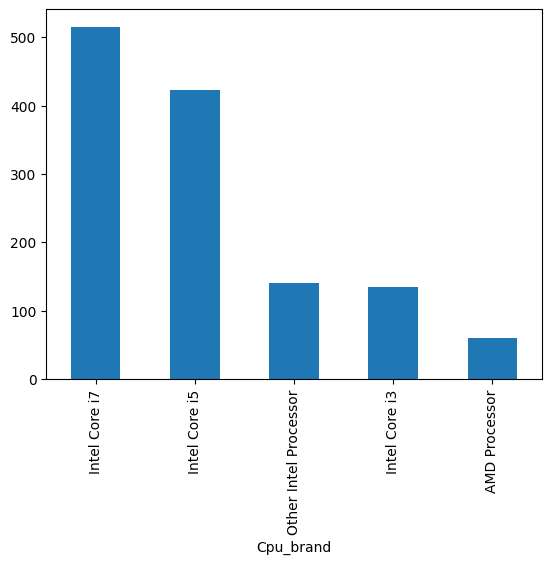

In [148]:
df['Cpu_brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu_brand'>

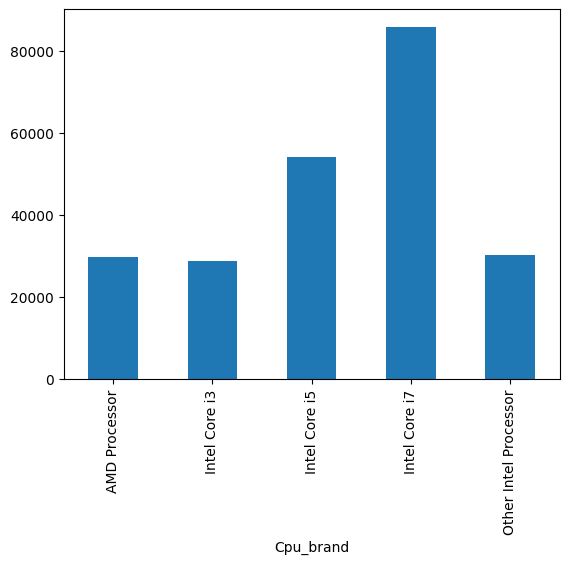

In [149]:
df.groupby('Cpu_brand')['Price'].mean().plot(kind='bar')

In [150]:
df.drop(['Cpu','Cpu Name'],axis=1,inplace=True)

In [151]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5


In [152]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

<Axes: xlabel='Ram'>

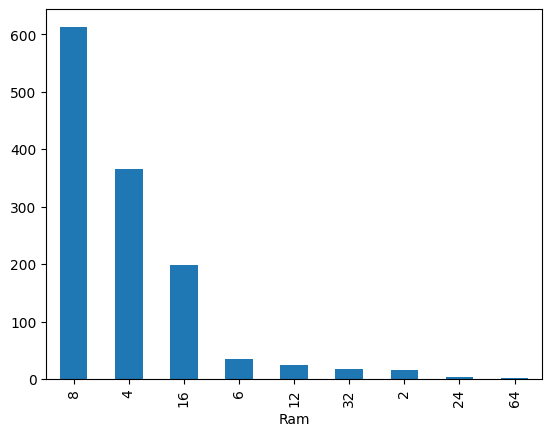

In [153]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram'>

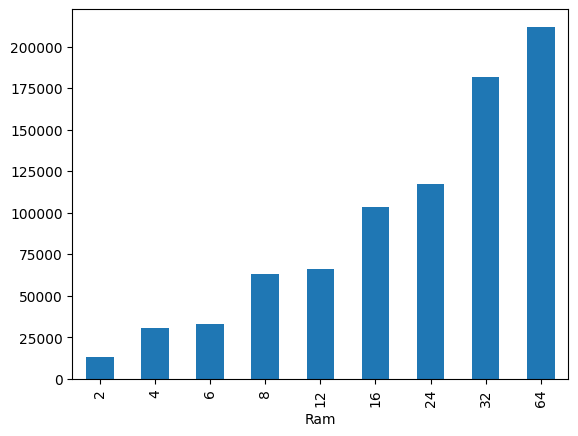

In [154]:
df.groupby('Ram')['Price'].mean().plot(kind='bar')

In [155]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [156]:
df['Memory']=np.where(df['Memory'] == '1TB HDD +  1TB HDD', '2TB HDD', df['Memory'])

In [157]:
def process_hdd(text):
    lst = text.split("+")
    if len(lst) == 1:
        if "HDD" in lst[0]:
            size=lst[0].split('HDD')[0]
            if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
            if 'GB' in size: 
                size=size.replace('GB','*1.0')
            size=eval(size)
            return int(size)
        else:
            return 0
    else:
        has_hdd = False
        for memory in lst:
            if "HDD" in memory:
                has_hdd = True
                size=memory.split('HDD')[0]
                if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
                if 'GB' in size: 
                    size=size.replace('GB','*1.0')
                size=eval(size)
                return int(size)
        if not has_hdd:
            return 0

def process_ssd(text):
    lst = text.split("+")
    if len(lst) == 1:
        if "SSD" in lst[0]:
            size=lst[0].split('SSD')[0]
            if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
            if 'GB' in size: 
                size=size.replace('GB','*1.0')
            size=eval(size)
            return int(size)
        else:
            return 0
    else:
        has_ssd = False
        for memory in lst:
            if "SSD" in memory:
                has_ssd = True
                size=memory.split('SSD')[0]
                if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
                if 'GB' in size: 
                    size=size.replace('GB','*1.0')
                size=eval(size)
                return int(size)
        if not has_ssd:
            return 0
        
def process_hybrid(text):
    lst = text.split("+")
    if len(lst) == 1:
        if "Hybrid" in lst[0]:
            size=lst[0].split('Hybrid')[0]
            if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
            if 'GB' in size: 
                size=size.replace('GB','*1.0')
            size=eval(size)
            return int(size)
        else:
            return 0
    else:
        has_hybrid = False
        for memory in lst:
            if "Hybrid" in memory:
                has_hybrid = True
                size=memory.split('Hybrid')[0]
                if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
                if 'GB' in size: 
                    size=size.replace('GB','*1.0')
                size=eval(size)
                return int(size)
        if not has_hybrid:
            return 0
        
def process_flash(text):
    lst = text.split("+")
    if len(lst) == 1:
        if "Flash" in lst[0]:
            size=lst[0].split('Flash')[0]
            if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
            if 'GB' in size: 
                size=size.replace('GB','*1.0')
            size=eval(size)
            return int(size)
        else:
            return 0
    else:
        has_flash = False
        for memory in lst:
            if "Flash" in memory:
                has_flash = True
                size=memory.split('Flash')[0]
                if 'TB' in size: 
                    size=size.replace('TB','*1024.0')
                if 'GB' in size: 
                    size=size.replace('GB','*1.0')
                size=eval(size)
                return int(size)
        if not has_flash:
            return 0

In [158]:
process_hdd('1TB SSD')

0

In [159]:
df['HDD']=df['Memory'].apply(process_hdd)
df['SSD']=df['Memory'].apply(process_ssd)
df['Hybrid']=df['Memory'].apply(process_hybrid)
df['Flash_Storage']=df['Memory'].apply(process_flash)

In [160]:
df[df['Memory'] == '1TB HDD +  1TB HDD']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage


In [161]:
df.loc[703]

Company                         Lenovo
TypeName                      Notebook
Ram                                  4
Memory                         2TB HDD
Gpu              Intel HD Graphics 620
OpSys                       Windows 10
Weight                             2.1
Price                        33110.856
Touchscreen                          0
IPS                                  0
Display_HD                           1
PPI                         141.211998
Cpu_brand                Intel Core i5
HDD                               2048
SSD                                  0
Hybrid                               0
Flash_Storage                        0
Name: 703, dtype: object

In [162]:
df[['Memory','HDD','SSD','Hybrid','Flash_Storage']].sample(10)

,Memory,HDD,SSD,Hybrid,Flash_Storage
1107,256GB SSD,0,256,0,0
1036,500GB HDD,500,0,0,0
642,512GB SSD,0,512,0,0
1179,500GB HDD,500,0,0,0
436,500GB HDD,500,0,0,0
89,256GB SSD,0,256,0,0
662,500GB HDD,500,0,0,0
948,1TB HDD,1024,0,0,0
1150,1TB HDD,1024,0,0,0
323,1TB HDD,1024,0,0,0


In [163]:
df.drop(['Memory'],axis=1,inplace=True)

In [164]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,0,0


<Axes: xlabel='HDD'>

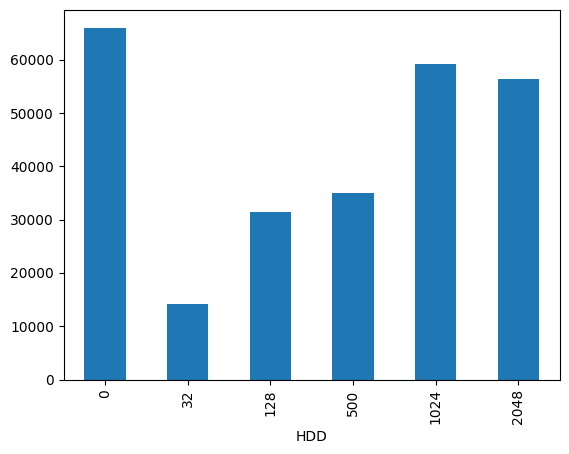

In [165]:
df.groupby('HDD')['Price'].mean().plot(kind='bar')

<Axes: xlabel='SSD'>

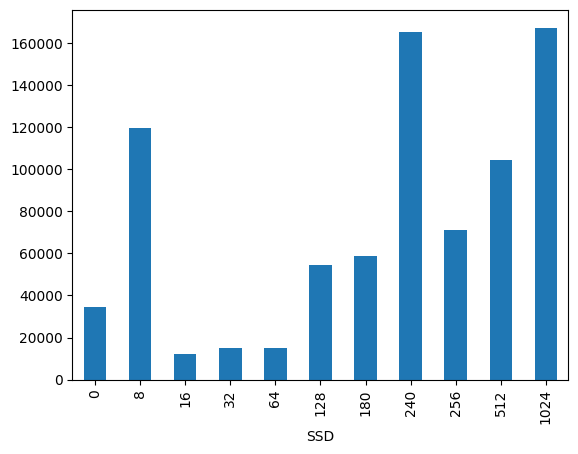

In [166]:
df.groupby('SSD')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Hybrid'>

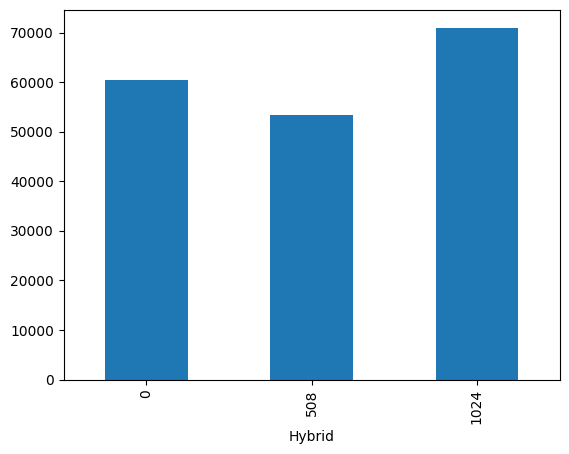

In [167]:
df.groupby('Hybrid')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Flash_Storage'>

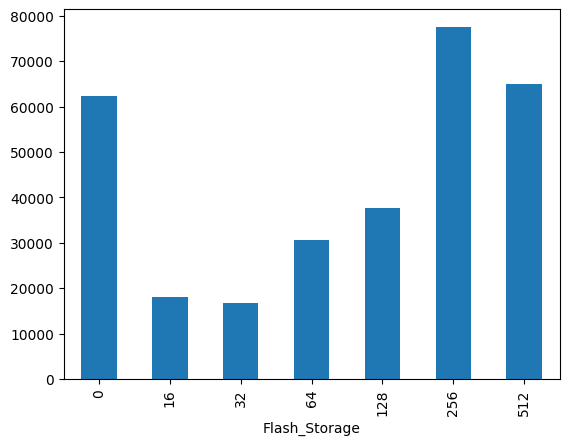

In [168]:
df.groupby('Flash_Storage')['Price'].mean().plot(kind='bar')

53440.25270554562 74160.2480344086 69250.52015999999 29037.31483943662


<BarContainer object of 4 artists>

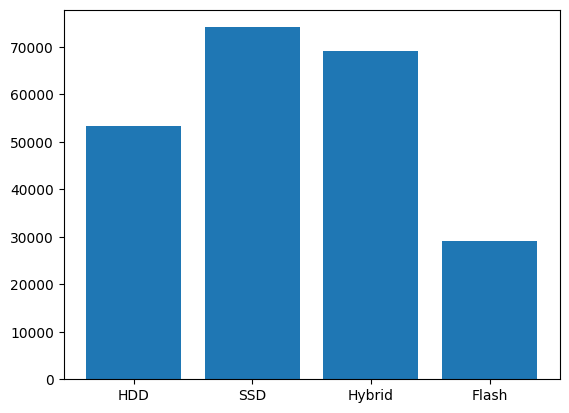

In [169]:
hdd=df[df['HDD'] > 0]['Price'].mean()
ssd=df[df['SSD'] > 0]['Price'].mean()
hybrid=df[df['Hybrid'] > 0]['Price'].mean()
flash=df[df['Flash_Storage'] > 0]['Price'].mean()
print(hdd, ssd, hybrid, flash)
plt.bar(['HDD','SSD','Hybrid','Flash'],[hdd,ssd,hybrid,flash])

In [170]:
df.select_dtypes(exclude=['object']).corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
Display_HD       0.367844
PPI              0.469539
HDD             -0.096519
SSD              0.675305
Hybrid           0.022569
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [171]:
# As we can see Hybrid and Flash Storage are highly correlated, so we can drop one of them
df.drop(['Hybrid', 'Flash_Storage'],axis=1,inplace=True)

In [172]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256


In [173]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [174]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [175]:
df['Gpu Brand']=df['Gpu'].str.split().str[0]

In [176]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel


In [177]:
df.drop(['Gpu'],axis=1,inplace=True)

In [178]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu Brand'>

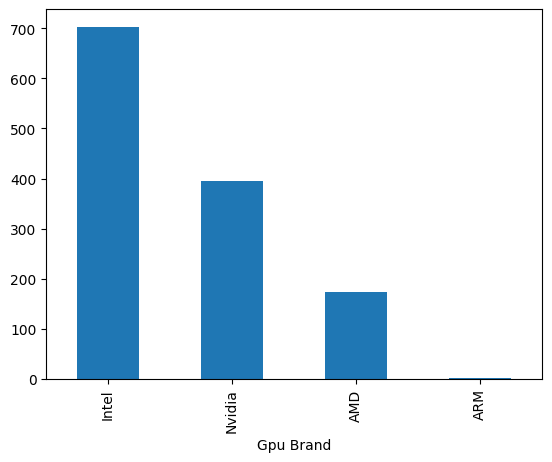

In [179]:
df['Gpu Brand'].value_counts().plot(kind='bar')

In [180]:
# drop the ARM GPU as it is not used in laptops
df=df[df['Gpu Brand'] != 'ARM']

<Axes: xlabel='Gpu Brand'>

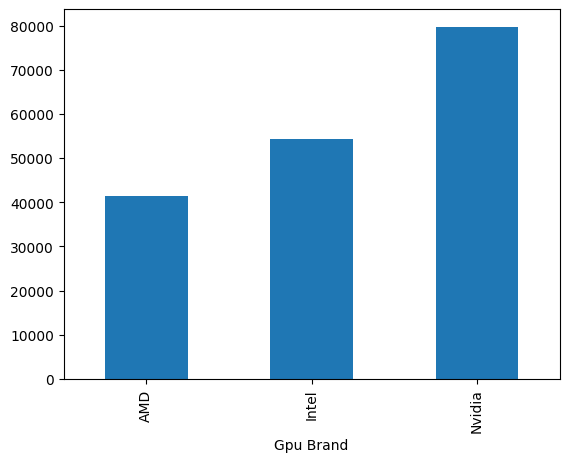

In [181]:
df.groupby('Gpu Brand')['Price'].mean().plot(kind='bar')

In [182]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel


In [183]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

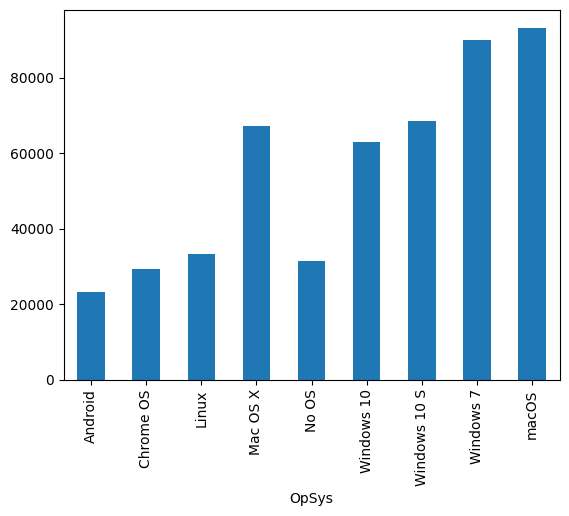

In [184]:
df.groupby('OpSys')['Price'].mean().plot(kind='bar')

In [185]:
def process_os(text):
    if 'Windows' in text:
        return 'Windows'
    elif 'Mac' in text or 'macOS' in text:
        return 'Mac'
    elif 'Linux' in text:
        return 'Linux'
    else:
        return 'Others'

In [186]:
df['OpSys']=df['OpSys'].apply(process_os)

In [187]:
df.head(10)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel
5,Acer,Notebook,4,Windows,2.10,21312.0000,0,0,0,100.454670,AMD Processor,500,0,AMD
6,Apple,Ultrabook,16,Mac,2.04,114017.6016,0,1,0,220.534624,Intel Core i7,0,0,Intel
7,Apple,Ultrabook,8,Mac,1.34,61735.5360,0,0,0,127.677940,Intel Core i5,0,0,Intel
8,Asus,Ultrabook,16,Windows,1.30,79653.6000,0,0,1,157.350512,Intel Core i7,0,512,Nvidia
9,Acer,Ultrabook,8,Windows,1.60,41025.6000,0,1,1,157.350512,Intel Core i5,0,256,Intel


In [188]:
df['OpSys'].value_counts()

OpSys
Windows    1100
Others       94
Linux        58
Mac          21
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

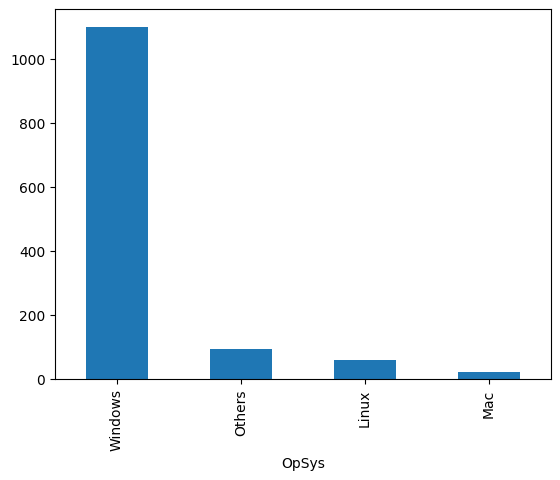

In [189]:
df['OpSys'].value_counts().plot(kind='bar')

<Axes: xlabel='OpSys'>

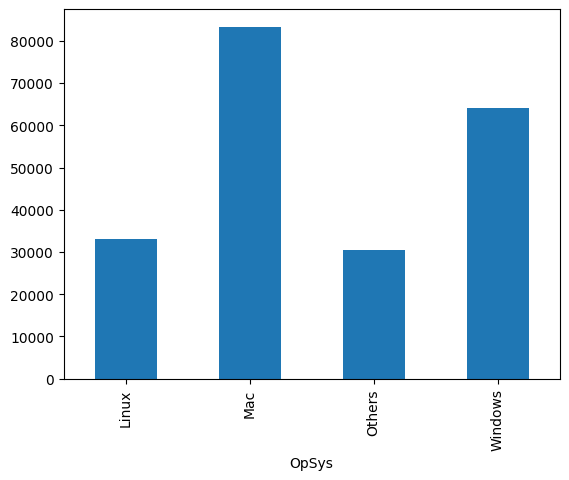

In [190]:
df.groupby('OpSys')['Price'].mean().plot(kind='bar')

In [191]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel


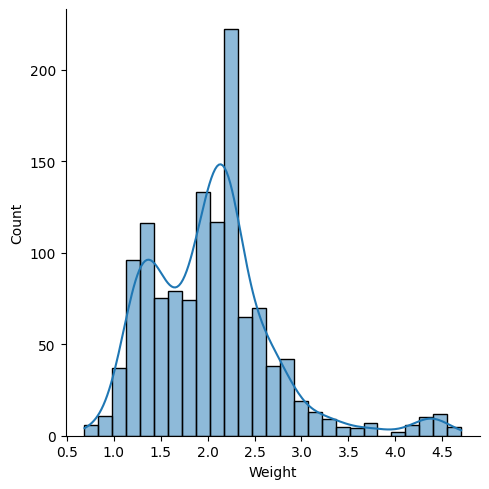

In [192]:
sns.displot(data=df, x='Weight', kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

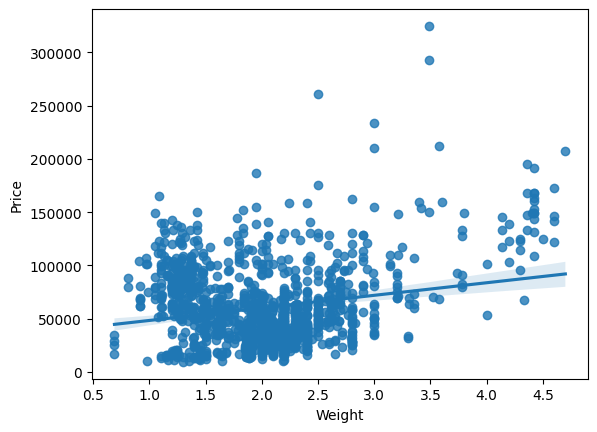

In [193]:
sns.regplot(x=df['Weight'],y=df['Price'])

In [194]:
df.select_dtypes(exclude=['object']).corr()['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
IPS            0.251514
Display_HD     0.367427
PPI            0.471481
HDD           -0.096987
SSD            0.675158
Name: Price, dtype: float64

In [195]:
df.select_dtypes(exclude=['object']).corr()

,Ram,Weight,Price,Touchscreen,IPS,Display_HD,PPI,HDD,SSD
Ram,1.000000,0.389134,0.739996,0.113316,0.202809,0.345133,0.294927,0.099140,0.600732
Weight,0.389134,1.000000,0.211667,-0.292288,0.023966,0.121854,-0.319499,0.510982,-0.055664
Price,0.739996,0.211667,1.000000,0.190382,0.251514,0.367427,0.471481,-0.096987,0.675158
Touchscreen,0.113316,-0.292288,0.190382,1.000000,0.136973,0.048554,0.452107,-0.204401,0.251029
IPS,0.202809,0.023966,0.251514,0.136973,1.000000,0.242006,0.288833,-0.089334,0.217928
Display_HD,0.345133,0.121854,0.367427,0.048554,0.242006,1.000000,0.368835,-0.026878,0.370989
PPI,0.294927,-0.319499,0.471481,0.452107,0.288833,0.368835,1.000000,-0.289189,0.505528
HDD,0.099140,0.510982,-0.096987,-0.204401,-0.089334,-0.026878,-0.289189,1.000000,-0.396971
SSD,0.600732,-0.055664,0.675158,0.251029,0.217928,0.370989,0.505528,-0.396971,1.000000


<Axes: >

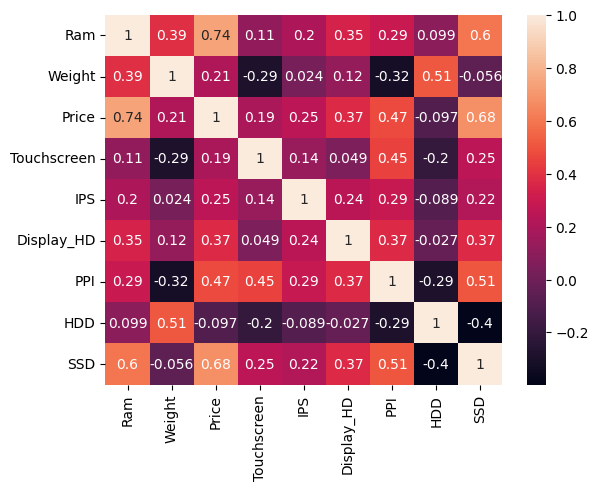

In [196]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr(),annot=True)

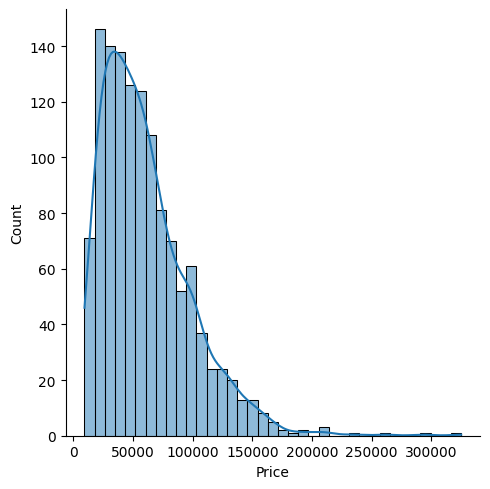

In [197]:
sns.displot(data=df, x='Price', kde=True)

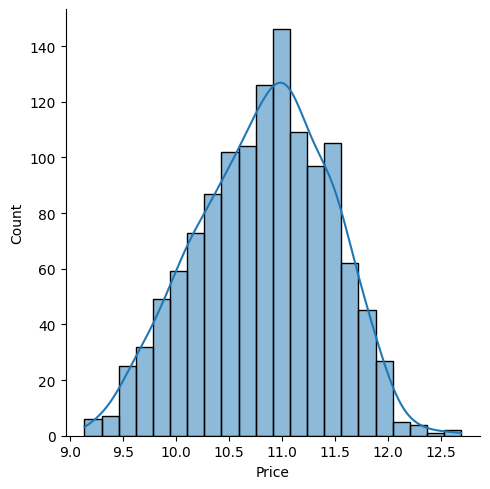

In [198]:
sns.displot(np.log(df['Price']), kde=True)

In [199]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel


In [200]:
x=df.drop(['Price'],axis=1)
y=np.log(df['Price'])

In [201]:
x.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,1,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,0,226.983005,Intel Core i5,0,256,Intel


In [202]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [204]:
x_train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
716,Dell,Notebook,8,Windows,1.90,0,0,1,141.211998,Intel Core i5,0,256,Intel
21,Lenovo,Gaming,8,Windows,2.50,0,1,1,141.211998,Intel Core i5,1024,128,Nvidia
968,Dell,Gaming,32,Windows,4.42,0,1,1,127.335675,Intel Core i7,1024,256,Nvidia
273,Lenovo,2 in 1 Convertible,16,Windows,1.36,1,0,0,209.800683,Intel Core i7,0,512,Intel
1234,Apple,Ultrabook,4,Mac,1.08,0,0,0,135.094211,Intel Core i5,0,0,Intel


In [205]:
x_test.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
248,HP,Notebook,4,Windows,1.49,0,1,1,165.632118,Intel Core i5,500,0,Intel
1272,Lenovo,Notebook,2,Windows,1.50,0,0,0,111.935204,Other Intel Processor,0,0,Intel
702,Lenovo,Notebook,8,Windows,2.20,0,0,0,100.454670,AMD Processor,1024,0,AMD
397,Lenovo,Notebook,8,Windows,1.90,0,1,1,157.350512,Intel Core i5,0,256,Intel
1053,HP,Notebook,4,Windows,2.04,0,0,0,100.454670,Intel Core i5,0,256,Intel


In [206]:
y_train.head()

716     11.047983
21      10.882316
968     12.030401
273     11.799207
1234    10.841452
Name: Price, dtype: float64

In [207]:
y_test.head()

248     10.490274
1272     9.409283
702     10.037018
397     10.819311
1053    10.862093
Name: Price, dtype: float64

## Model Building

In [208]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import set_config
set_config(display='diagram')

In [209]:
def train_metrics(y_test, y_pred):
    # Training Accuracy
    print("Mean Squared Error: ",mean_squared_error(y_train,y_pred))
    print("Mean Absolute Error: ",mean_absolute_error(y_train,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_train, y_pred)))
    print('Training Accuracy: ',r2_score(y_train,y_pred)*100)
def test_metrics(y_test, y_pred):
    # Testing Accuracy
    print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Testing Accuracy: ',r2_score(y_test,y_pred)*100)

### Linear Regression

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
numeric_preprocessor = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [212]:
numeric_preprocessor

Pipeline(steps=[('scaler', StandardScaler())])

In [213]:
catagorical_preprocessor = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first', max_categories=8)),
        ("scaler", StandardScaler())
    ]
)

In [214]:
catagorical_preprocessor

Pipeline(steps=[('onehot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               max_categories=8, sparse=False)),
                ('scaler', StandardScaler())])

In [215]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel


In [216]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, ['Ram','Weight','PPI','HDD','SSD']),
        ('cat', catagorical_preprocessor, ['Company','TypeName','Cpu_brand','Gpu Brand','OpSys'])
    ],
)

In [217]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Ram', 'Weight', 'PPI', 'HDD', 'SSD']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=8,
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['Company', 'TypeName', 'Cpu_brand',
                                  'Gpu Brand', 'OpSys'])])

In [218]:
pipe_linear_reg=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('linear_reg', LinearRegression())
    ]
)

In [219]:
pipe_linear_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('linear_reg', LinearRegression())])

In [220]:
pipe_linear_reg.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('linear_reg', LinearRegression())])

In [221]:
pipe_linear_reg['linear_reg'].coef_

array([ 0.13741322,  0.06049149,  0.1027682 ,  0.00321254,  0.11250533,
        0.0299656 ,  0.05700286,  0.07806266,  0.05498873,  0.04020399,
        0.06050541,  0.02840188,  0.02148341, -0.00241993, -0.08487208,
        0.04051159,  0.07785661,  0.02711767,  0.18217748,  0.22401378,
       -0.06135114,  0.04388238,  0.04035987,  0.0510674 , -0.02519349,
        0.05666554])

In [222]:
pipe_linear_reg['linear_reg'].intercept_

10.830547939472291

In [223]:
# Training Accuracy
train_metrics(y_train, pipe_linear_reg.predict(x_train))

Mean Squared Error:  0.06803579719971474
Mean Absolute Error:  0.20430769269114246
Root Mean Squared Error:  0.26083672517441775
Training Accuracy:  82.38955715055742


In [224]:
y_pred=pipe_linear_reg.predict(x_test)

In [225]:
y_pred

array([10.65859175,  9.82809746, 10.13608627, 10.86945314, 10.69958503,
       10.98671906, 11.0650676 , 11.22617218,  9.94584878, 10.00197935,
       11.11826023, 11.53043193, 11.24115842, 10.86091314, 10.01801068,
       11.16781601, 11.00472487, 10.68407803, 11.21944025, 11.40190676,
       11.43520362, 11.23981125, 10.02813413, 10.65859175, 10.43426185,
        9.6756568 , 11.05787117, 10.6132127 ,  9.61578683, 10.66989631,
       11.52612551, 10.56904661, 10.37489397, 10.14869729,  9.81753331,
       10.97327799,  9.95013588, 10.7681449 , 10.42094957, 11.96190315,
       11.14922192, 10.77552756, 11.98983958, 10.93356319, 10.53605062,
       11.9466528 , 10.76849175, 11.04370988, 10.84929785, 11.54648358,
       10.82874585, 10.91126346, 11.23141952, 10.58966973, 10.49754784,
       10.14928679, 10.00422322, 10.62997921, 10.69439351, 11.00715971,
       11.40414731, 10.68357477, 10.82897751,  9.92072893, 11.35287796,
       10.49407784, 10.97585033,  9.98578694, 11.22534813, 11.13

In [226]:
y_test

248     10.490274
1272     9.409283
702     10.037018
397     10.819311
1053    10.862093
          ...    
1255     9.801561
512     10.704190
592     10.377478
400      9.699146
1122    11.297411
Name: Price, Length: 191, dtype: float64

In [227]:
residuals=y_test-y_pred
residuals

248    -0.168318
1272   -0.418814
702    -0.099068
397    -0.050142
1053    0.162508
          ...   
1255   -0.061510
512    -0.007832
592     0.200936
400    -0.221836
1122    0.409921
Name: Price, Length: 191, dtype: float64

<Axes: xlabel='Price'>

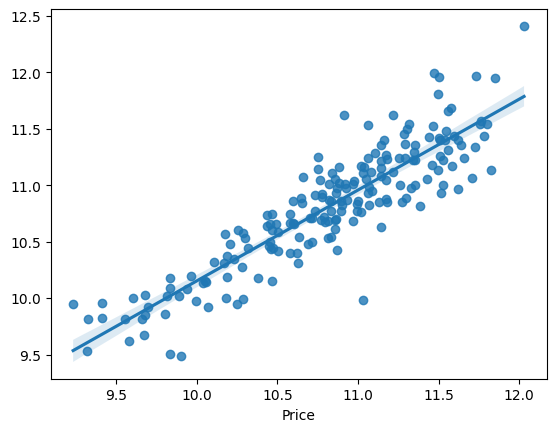

In [228]:
sns.regplot(x=y_test, y=y_pred)

<Axes: xlabel='Price', ylabel='Density'>

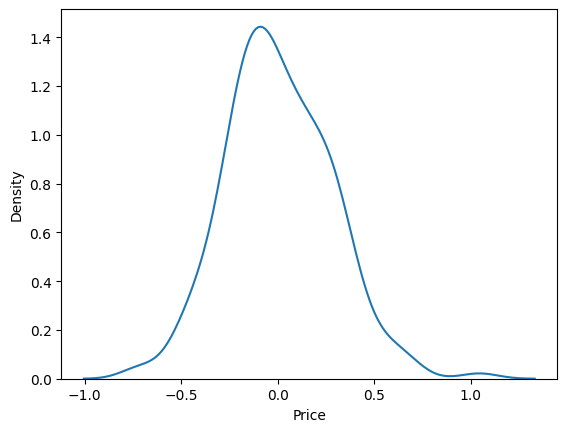

In [229]:
sns.kdeplot(residuals)

<Axes: ylabel='Price'>

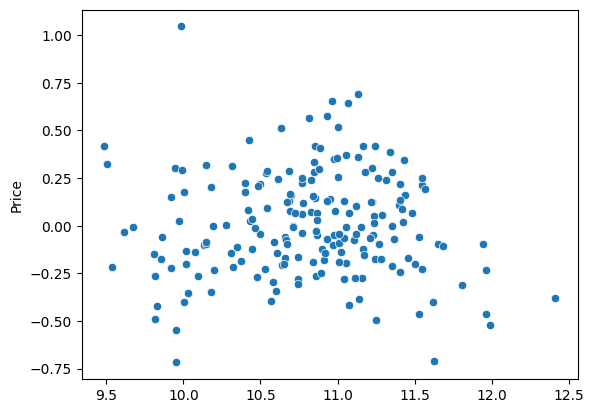

In [230]:
sns.scatterplot(x=y_pred, y=residuals)

In [231]:
# Testing Accuracy
test_metrics(y_test, y_pred)

Mean Squared Error:  0.07440737961491652
Mean Absolute Error:  0.21641566783230592
Root Mean Squared Error:  0.27277716109475975
Testing Accuracy:  79.75938611593637


### Ridge Regression

In [232]:
from sklearn.linear_model import Ridge

In [233]:
pipe_rideg_reg=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('ridge_reg', Ridge())
    ]
)

In [234]:
pipe_rideg_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('ridge_reg', Ridge())])

In [235]:
# Hyperparameter Tuning
parameters = {'ridge_reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [236]:
cv=GridSearchCV(pipe_rideg_reg, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

In [237]:
cv.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ram',
                                                                          'Weight',
                                                                          'PPI',
                                                                          'HDD',
                                                                          'SSD']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        max_categories=8,
                                                                                                        sparse=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu '
                                                                          'Brand',
                                                                          'OpSys'])])),
                                       ('ridge_reg', Ridge())]),
             param_grid={'ridge_reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
             scoring='neg_mean_squared_error')

In [238]:
cv.best_params_

{'ridge_reg__alpha': 1}

In [239]:
cv.best_score_

-0.07164666009078245

In [240]:
pipe_rideg_reg.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('ridge_reg', Ridge())])

In [241]:
y_pred=pipe_rideg_reg.predict(x_test)

In [242]:
# Testing Accuracy
test_metrics(y_test, y_pred)

Mean Squared Error:  0.07443844509593432
Mean Absolute Error:  0.21646245365290925
Root Mean Squared Error:  0.2728340981181317
Testing Accuracy:  79.75093555082228


### Lasso Regreesion

In [243]:
from sklearn.linear_model import Lasso

In [244]:
pipe_lasso=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lasso_reg', Lasso())
    ]
)

In [245]:
pipe_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('lasso_reg', Lasso())])

In [246]:
# Hyperparameter Tuning
parameters = {'lasso_reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [247]:
cv=GridSearchCV(pipe_lasso, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

In [248]:
cv.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ram',
                                                                          'Weight',
                                                                          'PPI',
                                                                          'HDD',
                                                                          'SSD']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        max_categories=8,
                                                                                                        sparse=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu '
                                                                          'Brand',
                                                                          'OpSys'])])),
                                       ('lasso_reg', Lasso())]),
             param_grid={'lasso_reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
             scoring='neg_mean_squared_error')

In [249]:
cv.best_params_

{'lasso_reg__alpha': 0.001}

In [250]:
pipe_lasso=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lasso_reg', Lasso(alpha=0.001))
    ]
)

In [251]:
pipe_lasso.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('lasso_reg', Lasso(alpha=0.001))])

In [252]:
# Training Accuracy
train_metrics(y_train, pipe_lasso.predict(x_train))

Mean Squared Error:  0.06813072089601573
Mean Absolute Error:  0.20420040553565555
Root Mean Squared Error:  0.2610186217418515
Training Accuracy:  82.36498702133767


In [253]:
y_pred=pipe_lasso.predict(x_test)

In [254]:
y_pred

array([10.65567787,  9.82685361, 10.15081411, 10.86557364, 10.69388193,
       10.98274473, 11.0657692 , 11.22304315,  9.93546338, 10.02035145,
       11.11669909, 11.53133389, 11.23372944, 10.8843469 , 10.01393093,
       11.16181201, 11.00739483, 10.68281736, 11.21724716, 11.39676112,
       11.43394109, 11.23761846, 10.04290315, 10.65567787, 10.4615551 ,
        9.71191495, 11.05345614, 10.60532484,  9.64044214, 10.66331365,
       11.52032295, 10.56402018, 10.36498849, 10.13725296,  9.8238743 ,
       11.00017656,  9.95128116, 10.77034667, 10.42007914, 11.95787988,
       11.15021694, 10.79944175, 11.98461688, 10.92957602, 10.5317443 ,
       11.94204891, 10.76014525, 11.04396003, 10.84876391, 11.53687059,
       10.82288091, 10.91701691, 11.230891  , 10.58379068, 10.52498632,
       10.14350251, 10.01270084, 10.63854729, 10.69811576, 11.00758402,
       11.40000598, 10.68643293, 10.82431604,  9.91679141, 11.35129465,
       10.48702455, 10.97096288,  9.99418904, 11.2213583 , 11.13

In [255]:
# Testing Accuracy
test_metrics(y_test, y_pred)

Mean Squared Error:  0.07432402597099766
Mean Absolute Error:  0.2165191707716764
Root Mean Squared Error:  0.2726243312160484
Testing Accuracy:  79.7820603309285


### KNN Regressor

In [256]:
from sklearn.neighbors import KNeighborsRegressor

In [257]:
pipe_knn=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('knn_reg', KNeighborsRegressor())
    ]
)

In [258]:
pipe_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('knn_reg', KNeighborsRegressor())])

In [259]:
parameters = {
    'knn_reg__n_neighbors': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'knn_reg__weights': ['uniform', 'distance'],
    'knn_reg__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn_reg__p': [1, 2],
    'knn_reg__metric': ['minkowski', 'euclidean', 'manhattan'],
    'knn_reg__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90]
}

In [260]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(pipe_knn, param_distributions=parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

In [261]:
cv.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeN...
                                              KNeighborsRegressor())]),
                   n_jobs=1,
                   param_distributions={'knn_reg__algorithm': ['auto',
                                                               'ball_tree',
                                                               'kd_tree',
                                                               'brute'],
                                        'knn_reg__leaf_size': [10, 20, 30, 40,
                                                               50, 60, 70, 80,
                                                               90],
                                        'knn_reg__metric': ['minkowski',
                                                            'euclidean',
                                                            'manhattan'],
                                        'knn_reg__n_neighbors': [3, 5, 10, 15,
                                                                 20, 25, 30, 35,
                                                                 40, 45, 50],
                                        'knn_reg__p': [1, 2],
                                        'knn_reg__weights': ['uniform',
                                                             'distance']},
                   scoring='neg_mean_squared_error')

In [262]:
cv.best_params_

{'knn_reg__weights': 'distance',
 'knn_reg__p': 2,
 'knn_reg__n_neighbors': 5,
 'knn_reg__metric': 'manhattan',
 'knn_reg__leaf_size': 20,
 'knn_reg__algorithm': 'ball_tree'}

In [263]:
pipe_knn=Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('knn_reg', KNeighborsRegressor(
            n_neighbors=10, 
            weights='distance', 
            algorithm='ball_tree', 
            p=1,
            metric='minkowski',
            leaf_size=10
            )
        )
    ]
)

In [264]:
pipe_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('knn_reg',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=10,
                                     n_neighbors=10, p=1,
                                     weights='distance'))])

In [265]:
pipe_knn.fit(x_train,y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('knn_reg',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=10,
                                     n_neighbors=10, p=1,
                                     weights='distance'))])

In [266]:
# Training Accuracy
train_metrics(y_train, pipe_knn.predict(x_train))

Mean Squared Error:  0.0018421275029789478
Mean Absolute Error:  0.014207066677266473
Root Mean Squared Error:  0.04292001284924025
Training Accuracy:  99.52318217103608


In [267]:
y_pred=pipe_knn.predict(x_test)

In [268]:
y_pred

array([10.81161336,  9.56887054, 10.07909385, 10.95284237, 10.76411792,
       10.92308508, 11.23196784, 11.17972741, 10.07981315,  9.74090729,
       11.28041619, 11.20528069, 11.23831668, 10.98286355, 10.07321214,
       11.54974987, 11.07108751, 10.80815519, 11.38409159, 11.26721724,
       11.32979373, 11.37526939,  9.69102545, 10.81161336, 10.55438822,
        9.71920436, 11.15701873, 10.43598604,  9.67265451, 10.75042355,
       11.43829647, 10.43924711, 10.30024149, 10.03614599,  9.73360507,
       11.02936649,  9.59212848, 11.0082214 , 10.50492202, 11.66119289,
       10.91581877, 10.63990698, 11.55055925, 10.92979056, 10.35453106,
       11.66099363, 10.73727524, 10.87723728, 10.96590592, 11.54343311,
       10.88621722, 10.86207513, 11.3404767 , 10.62545059, 10.63357207,
       10.29251381, 10.11014985, 11.41099905, 10.81872415, 11.17491915,
       11.43666773, 10.6794054 , 10.95646378,  9.88635767, 11.47054726,
       10.40817939, 11.1016483 , 10.188879  , 11.09232744, 11.13

In [269]:
# Testing Accuracy
test_metrics(y_test, y_pred)

Mean Squared Error:  0.0601176144653879
Mean Absolute Error:  0.18190374511021154
Root Mean Squared Error:  0.2451889362621974
Testing Accuracy:  83.64654919549164


### Decision Tree Regressor

In [270]:
from sklearn.tree import DecisionTreeRegressor

In [271]:
pipe_dt=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("dt_reg", DecisionTreeRegressor(max_depth=8))
    ]
)

In [272]:
parameters={
    "dt_reg__max_depth": [3, 5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 100],
    "dt_reg__max_features": ["auto", "sqrt", "log2"]
}

In [273]:
cv=GridSearchCV(pipe_dt, param_grid=parameters, cv=5, scoring="neg_mean_squared_error")

In [274]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ram',
                                                                          'Weight',
                                                                          'PPI',
                                                                          'HDD',
                                                                          'SSD']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        max_categories=8,
                                                                                                        sparse=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu '
                                                                          'Brand',
                                                                          'OpSys'])])),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=8))]),
             param_grid={'dt_reg__max_depth': [3, 5, 8, 10, 20, 30, 40, 50, 60,
                                               70, 80, 100],
                         'dt_reg__max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [275]:
cv.best_params_

{'dt_reg__max_depth': 70, 'dt_reg__max_features': 'sqrt'}

In [276]:
pipe_dt=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("dt_reg", DecisionTreeRegressor(
            max_depth=50,
            max_features='log2',
        ))
    ]
)

In [277]:
pipe_dt.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=50, max_features='log2'))])

In [278]:
train_metrics(y_train, pipe_dt.predict(x_train))

Mean Squared Error:  0.0018421275029789476
Mean Absolute Error:  0.014207066677266475
Root Mean Squared Error:  0.04292001284924024
Training Accuracy:  99.52318217103608


In [279]:
y_pred=pipe_dt.predict(x_test)

In [280]:
y_pred

array([10.43548113,  9.49301392, 10.10461124, 10.95284237, 10.70777173,
       11.13017638, 11.21906685, 11.18267988, 10.12438176, 10.20800904,
       11.28811452, 11.41335615, 11.35269474, 10.77684406, 10.08480861,
       11.01872094, 11.28811452, 10.92871023, 11.38409159, 11.26721724,
       11.47054726, 11.44293209,  9.67265451, 10.43548113, 10.88531431,
        9.9261188 , 11.28811452, 10.38737929,  9.67265451, 10.50533671,
       11.28811452, 10.1861611 ,  9.98927618,  9.96449738,  9.9261188 ,
       10.97407067,  9.47681924, 10.72908062, 10.62971355, 11.41335615,
       10.59829735, 10.65892197, 11.83458801, 10.89377146, 10.15970992,
       11.70836856, 10.65892197, 10.68364511, 10.90056291, 11.67131902,
       11.11838843, 10.97771698, 11.219074  , 10.87326597, 10.63357207,
       10.27757542, 11.37128263, 11.41099905, 10.97771698, 10.97771698,
       11.5608421 , 11.04798293, 11.13017638,  9.88635767, 11.47054726,
       10.37082262, 11.1016483 , 11.14491104, 11.39554095, 11.02

In [281]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.12165557216793543
Mean Absolute Error:  0.2413795954119887
Root Mean Squared Error:  0.3487915884420601
Testing Accuracy:  66.90673054420553


Decision Tree leads to overfitting

### SVR

In [282]:
from sklearn.svm import SVR

In [283]:
pipe_svr=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("svr_reg", SVR())
    ]
)

In [284]:
pipe_svr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('svr_reg', SVR())])

In [285]:
parameters={
    "svr_reg__kernel":["poly", "rbf", "sigmoid", "precomputed"],
    "svr_reg__C": [1, 10, 100, 1000],
    "svr_reg__epsilon": [0.001, 0.01, 0.1, 10, 100, 1000]
}

In [286]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(pipe_svr, param_distributions=parameters, cv=5, scoring='neg_mean_squared_error')

In [287]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeName',
                                                                                'Cpu_brand',
                                                                                'Gpu '
                                                                                'Brand',
                                                                                'OpSys'])])),
                                             ('svr_reg', SVR())]),
                   param_distributions={'svr_reg__C': [1, 10, 100, 1000],
                                        'svr_reg__epsilon': [0.001, 0.01, 0.1,
                                                             10, 100, 1000],
                                        'svr_reg__kernel': ['poly', 'rbf',
                                                            'sigmoid',
                                                            'precomputed']},
                   scoring='neg_mean_squared_error')

In [288]:
cv.best_params_

{'svr_reg__kernel': 'poly', 'svr_reg__epsilon': 10, 'svr_reg__C': 1}

In [289]:
pipe_svr=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("svr_reg", SVR(
            C=10,
            epsilon=0.01,
            kernel='rbf'
        ))
    ]
)

In [290]:
pipe_svr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('svr_reg', SVR(C=10, epsilon=0.01))])

In [291]:
pipe_svr.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('svr_reg', SVR(C=10, epsilon=0.01))])

In [292]:
train_metrics(y_train, pipe_svr.predict(x_train))

Mean Squared Error:  0.019418660944686177
Mean Absolute Error:  0.07758982393758936
Root Mean Squared Error:  0.13935085555778326
Training Accuracy:  94.97365750304559


In [293]:
y_pred=pipe_svr.predict(x_test)

In [294]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.0654908372666655
Mean Absolute Error:  0.1976417956886721
Root Mean Squared Error:  0.2559117763344733
Testing Accuracy:  82.18490213042145


### Random Forest

In [295]:
from sklearn.ensemble import RandomForestRegressor

In [296]:
pipe_rf=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("rf_reg", RandomForestRegressor())
    ]
)

In [297]:
pipe_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('rf_reg', RandomForestRegressor())])

In [298]:
parameters={
    "rf_reg__n_estimators": [2, 3, 5, 10, 50, 100, 1000],
    "rf_reg__max_depth": [3, 5, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100],
    "rf_reg__max_features": ["auto", "sqrt", "log2", 0.75],
    "rf_reg__max_samples": [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
}

In [299]:
cv=RandomizedSearchCV(pipe_rf, param_distributions=parameters, cv=5, scoring="neg_mean_squared_error", n_iter=100)

In [300]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeN...,
                                                                                'Cpu_brand',
                                                                                'Gpu '
                                                                                'Brand',
                                                                                'OpSys'])])),
                                             ('rf_reg',
                                              RandomForestRegressor())]),
                   n_iter=100,
                   param_distributions={'rf_reg__max_depth': [3, 5, 8, 10, 15,
                                                              20, 30, 40, 50,
                                                              60, 70, 80, 100],
                                        'rf_reg__max_features': ['auto', 'sqrt',
                                                                 'log2', 0.75],
                                        'rf_reg__max_samples': [0.1, 0.2, 0.3,
                                                                0.5, 0.7, 0.8,
                                                                0.9],
                                        'rf_reg__n_estimators': [2, 3, 5, 10,
                                                                 50, 100,
                                                                 1000]},
                   scoring='neg_mean_squared_error')

In [301]:
cv.best_params_

{'rf_reg__n_estimators': 1000,
 'rf_reg__max_samples': 0.9,
 'rf_reg__max_features': 'sqrt',
 'rf_reg__max_depth': 70}

In [302]:
pipe_rf=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("rf_reg", RandomForestRegressor(
            n_estimators=1000,
            max_samples=0.9,
            max_features="log2",
            max_depth=60
        ))
    ]
)

In [303]:
pipe_rf.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('rf_reg',
                 RandomForestRegressor(max_depth=60, max_features='log2',
                                       max_samples=0.9, n_estimators=1000))])

In [304]:
train_metrics(y_train, pipe_rf.predict(x_train))

Mean Squared Error:  0.008511600564109458
Mean Absolute Error:  0.06977374371162788
Root Mean Squared Error:  0.0922583360142023
Training Accuracy:  97.79685016622159


In [305]:
y_pred=pipe_rf.predict(x_test)

In [306]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.04851526806868244
Mean Absolute Error:  0.16910849205517803
Root Mean Squared Error:  0.220261817092029
Testing Accuracy:  86.80266912311497


### Extra Trees Regressor

In [307]:
from sklearn.ensemble import ExtraTreesRegressor

In [308]:
pipe_et=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("et_reg", ExtraTreesRegressor(bootstrap=True))
    ]
)

In [309]:
parameters={
    "et_reg__n_estimators": [2, 3, 5, 10, 50, 100, 1000],
    "et_reg__max_depth": [3, 5, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100],
    "et_reg__max_features": ["sqrt", "log2", 0.75],
    "et_reg__max_samples": [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
}

In [310]:
cv=RandomizedSearchCV(pipe_et, param_distributions=parameters, cv=5, scoring="neg_mean_squared_error", n_iter=100)

In [311]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeN...
                                                                                'Cpu_brand',
                                                                                'Gpu '
                                                                                'Brand',
                                                                                'OpSys'])])),
                                             ('et_reg',
                                              ExtraTreesRegressor(bootstrap=True))]),
                   n_iter=100,
                   param_distributions={'et_reg__max_depth': [3, 5, 8, 10, 15,
                                                              20, 30, 40, 50,
                                                              60, 70, 80, 100],
                                        'et_reg__max_features': ['sqrt', 'log2',
                                                                 0.75],
                                        'et_reg__max_samples': [0.1, 0.2, 0.3,
                                                                0.5, 0.7, 0.8,
                                                                0.9],
                                        'et_reg__n_estimators': [2, 3, 5, 10,
                                                                 50, 100,
                                                                 1000]},
                   scoring='neg_mean_squared_error')

In [312]:
cv.best_params_

{'et_reg__n_estimators': 1000,
 'et_reg__max_samples': 0.9,
 'et_reg__max_features': 'sqrt',
 'et_reg__max_depth': 40}

In [313]:
pipe_et=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("et_reg", ExtraTreesRegressor(
            bootstrap=True,
            n_estimators=100,
            max_samples=0.9,
            max_features="sqrt",
            max_depth=60
        ))
    ]
)

In [314]:
pipe_et.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('et_reg',
                 ExtraTreesRegressor(bootstrap=True, max_depth=60,
                                     max_features='sqrt', max_samples=0.9))])

In [315]:
train_metrics(y_train, pipe_et.predict(x_train))

Mean Squared Error:  0.009232260508727488
Mean Absolute Error:  0.07179397377260077
Root Mean Squared Error:  0.09608465282617973
Training Accuracy:  97.61031394130863


In [316]:
y_pred=pipe_et.predict(x_test)

In [317]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.05084807992098457
Mean Absolute Error:  0.17386589092500096
Root Mean Squared Error:  0.225495188243529
Testing Accuracy:  86.16808765806431


### Adaboost Regressor

In [318]:
from sklearn.ensemble import AdaBoostRegressor

In [319]:
pipe_ada=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("adaboost_reg", AdaBoostRegressor())
    ]
)

In [320]:
parameters = {
    "adaboost_reg__n_estimators": [2, 3, 5, 10, 50, 100, 1000],
    "adaboost_reg__learning_rate": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [321]:
cv=GridSearchCV(pipe_ada, param_grid=parameters, cv=5, scoring="neg_mean_squared_error")

In [322]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ram',
                                                                          'Weight',
                                                                          'PPI',
                                                                          'HDD',
                                                                          'SSD']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        max_categories=8,
                                                                                                        sparse=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Company',
                                                                          'TypeName',
                                                                          'Cpu_brand',
                                                                          'Gpu '
                                                                          'Brand',
                                                                          'OpSys'])])),
                                       ('adaboost_reg', AdaBoostRegressor())]),
             param_grid={'adaboost_reg__learning_rate': [0.001, 0.01, 0.1, 1,
                                                         10, 100, 1000],
                         'adaboost_reg__n_estimators': [2, 3, 5, 10, 50, 100,
                                                        1000]},
             scoring='neg_mean_squared_error')

In [323]:
cv.best_params_

{'adaboost_reg__learning_rate': 1, 'adaboost_reg__n_estimators': 100}

In [324]:
pipe_ada=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("adaboost_reg", AdaBoostRegressor(n_estimators=1000, learning_rate=1.0))
    ]
)

In [325]:
pipe_ada.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('adaboost_reg', AdaBoostRegressor(n_estimators=1000))])

In [326]:
train_metrics(y_train, pipe_ada.predict(x_train))

Mean Squared Error:  0.06897742608923502
Mean Absolute Error:  0.2206903039008433
Root Mean Squared Error:  0.26263553851151794
Training Accuracy:  82.14582513848731


In [327]:
y_pred=pipe_ada.predict(x_test)

In [328]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.06918276603796973
Mean Absolute Error:  0.21616938899198315
Root Mean Squared Error:  0.2630261698728279
Testing Accuracy:  81.1806078637214


### Gradient Boost Regressor

In [329]:
from sklearn.ensemble import GradientBoostingRegressor

In [330]:
pipe=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("gb_reg", GradientBoostingRegressor())
    ]
)

In [331]:
parameters = {
    "gb_reg__n_estimators": [2, 3, 5, 10, 50, 100, 500, 1000],
    "gb_reg__learning_rate": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "gb_reg__max_depth": [3, 5, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100],
    "gb_reg__max_features": ["auto", "sqrt", "log2", 0.75]
}

In [332]:
cv=RandomizedSearchCV(pipe, param_distributions=parameters, cv=5, scoring="neg_mean_squared_error", n_iter=100)

In [333]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeN...
                                                                                'Cpu_brand',
                                                                                'Gpu '
                                                                                'Brand',
                                                                                'OpSys'])])),
                                             ('gb_reg',
                                              GradientBoostingRegressor())]),
                   n_iter=100,
                   param_distributions={'gb_reg__learning_rate': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000],
                                        'gb_reg__max_depth': [3, 5, 8, 10, 15,
                                                              20, 30, 40, 50,
                                                              60, 70, 80, 100],
                                        'gb_reg__max_features': ['auto', 'sqrt',
                                                                 'log2', 0.75],
                                        'gb_reg__n_estimators': [2, 3, 5, 10,
                                                                 50, 100, 500,
                                                                 1000]},
                   scoring='neg_mean_squared_error')

In [334]:
cv.best_params_

{'gb_reg__n_estimators': 500,
 'gb_reg__max_features': 'log2',
 'gb_reg__max_depth': 8,
 'gb_reg__learning_rate': 0.01}

In [335]:
pipe_gb=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("gb_reg", GradientBoostingRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=8,
            max_features="sqrt"
        ))
    ]
)

In [336]:
pipe_gb.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('gb_reg',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=8,
                                           max_features='sqrt',
                                           n_estimators=1000))])

In [337]:
train_metrics(y_train, pipe_gb.predict(x_train))

Mean Squared Error:  0.005325863942015017
Mean Absolute Error:  0.04906026822808161
Root Mean Squared Error:  0.07297851698969374
Training Accuracy:  98.62144890726502


In [338]:
y_pred=pipe_gb.predict(x_test)

In [339]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.04970165524624704
Mean Absolute Error:  0.16880001717026913
Root Mean Squared Error:  0.22293868046224513
Testing Accuracy:  86.47994300505563


### XGBoost Regressor

In [340]:
from xgboost import XGBRegressor

In [341]:
pipe=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("xgb_reg", XGBRegressor())
    ]
)

In [342]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [343]:
parameters = { 
    "xgb_reg__n_estimators": [3, 5, 10, 50, 100, 500, 1000],
    "xgb_reg__learning_rate": [0.01, 0.1, 0.5, 1],
    "xgb_reg__max_depth": [3, 5, 8, 10, 15, 20, 50]
}

In [344]:
cv=RandomizedSearchCV(pipe, param_distributions=parameters, cv=5, scoring="neg_mean_squared_error", n_iter=100)

In [345]:
cv.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: Future

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Ram',
                                                                                'Weight',
                                                                                'PPI',
                                                                                'HDD',
                                                                                'SSD']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              max_categories=8,
                                                                                                              sparse=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Company',
                                                                                'TypeN...
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_iter=100,
                   param_distributions={'xgb_reg__learning_rate': [0.01, 0.1,
                                                                   0.5, 1],
                                        'xgb_reg__max_depth': [3, 5, 8, 10, 15,
                                                               20, 50],
                                        'xgb_reg__n_estimators': [3, 5, 10, 50,
                                                                  100, 500,
                                                                  1000]},
                   scoring='neg_mean_squared_error')

In [346]:
cv.best_params_

{'xgb_reg__n_estimators': 1000,
 'xgb_reg__max_depth': 3,
 'xgb_reg__learning_rate': 0.1}

In [347]:
pipe_xgb=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("xgb_reg", XGBRegressor(
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3
        ))
    ]
)

In [348]:
pipe_xgb.fit(x_train, y_train)

/home/arnab/anaconda3/envs/laptopenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight', 'PPI',
                                                   'HDD', 'SSD']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=8,
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu Brand',
                                                   'OpSys...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [349]:
train_metrics(y_train, pipe_xgb.predict(x_train))

Mean Squared Error:  0.011655484035830497
Mean Absolute Error:  0.08303399438330185
Root Mean Squared Error:  0.10796056704107522
Training Accuracy:  96.98308472974807


In [350]:
y_pred=pipe_xgb.predict(x_test)

In [351]:
test_metrics(y_test, y_pred)

Mean Squared Error:  0.048779087032614146
Mean Absolute Error:  0.16474634686348302
Root Mean Squared Error:  0.2208598809938422
Testing Accuracy:  86.7309039593386


## Testing of Model

we are selecting Random Forest Classifier model, which is giving
* Train Accuracy: 97%
* Test Accuracy: 86%

In [352]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Display_HD,PPI,Cpu_brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel


In [353]:
input=pd.DataFrame({
    'Company': ['HP'],
    'TypeName': ['Notebook'],
    'Ram': [8],
    'Weight': [1.86],
    'Cpu_brand': ['Intel Core i5'],
    'Gpu Brand': ['Intel'],
    'OpSys': ['Windows'],
    'PPI': [157.35],
    'HDD': [0],
    'SSD': [256],
    'Touchscreen': [0],
    'IPS': [0],
    'Display_HD': [1]
})

In [354]:
price=pipe_rf.predict(input)
np.exp(price[0])

51017.10588340194

In [355]:
import pickle

In [356]:
pickle.dump(pipe_rf, open('model.pkl','wb'))

In [357]:
model=pickle.load(open('model.pkl','rb'))

In [358]:
np.exp(model.predict(input))[0]

51017.10588340194

In [360]:
pickle.dump(df, open('dataframe.pkl','wb'))

In [367]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)